In [1]:
from fiatlux.optical_object.field_dev import Field
from fiatlux.optical_object.source_dev import Source, PointSource, ExtendedSource
from fiatlux.physical_object.spectrum_dev import (
    Monochromatic,
    Photometric,
    SpectralBand,
)
from fiatlux.optical_object.propagators import FFT
from fiatlux.optical_object.mask import CircularPupil

import matplotlib.pyplot as plt
import numpy as np


star = PointSource(
    incidence_angles=[0.1, 0.1],
    spectrum=Photometric(magnitude=10, spectral_band=SpectralBand.V),
)
satellite = ExtendedSource(
    incidence_angles_list=[
        [i, j] for i, j in zip(0.5 + np.linspace(0, 0.5), np.linspace(0, 0.5))
    ]
)
N = 256
field = Field(
    field_size=N,
    sources=[star, satellite],
    optical_path=[FFT(), FFT(), CircularPupil(physical_diameter=0.1,resolution=10)],
)

In [2]:
print(Photometric(magnitude=0, spectral_band=SpectralBand.V).photon_number)
print(Monochromatic(wavelength=550e-9, irradiance=1).photon_number)


8967391304.347826 ph / (s m2)
2.76876411214849e+18 W ph / (J m2)


In [3]:
field.resolve()
print(field.optical_states[-1].complex_amplitudes[0].photon)

7042.972660901031 ph / s


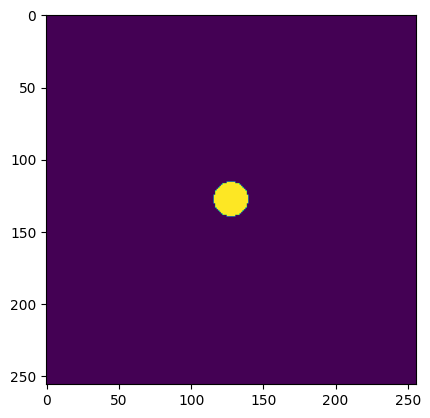

In [10]:
plt.imshow(np.abs(field.optical_states[-1].complex_amplitudes[1].complex_amplitude[:,:,0]))